# Exercise2

> #### importing the data

* make a **master bias**
* do not forget to take your values in float
* 
if you use `fits.open`
```python
    h = fits.open('filename')
    data = h[0].data.astype(float)
```
if you use `fits.getdata`
```python
    h = fits.getdata(filename, dtype='f')
```


base import strcure

In [3]:
## reference 
import os
import dfitspy
from astropy.io import fits 

dirSCIENCE = 'M67/SCIENCE/'
dirCALIB = 'M67/CALIB/'
listFiles = dfitspy.get_files(['all'], dire = dirCALIB)
print(len(listFiles))
keys = ['OBJECTS', 'NAXIS1', 'NAXIS2', 'CDELT1', 'CDELT2', 'EXPTIME']
fitsFiles = dfitspy.dfitsort(listFiles, keys, grepping=['BIAS'])
print(len(fitsFiles))
dfitspy.dfitsort_view(fitsFiles)

142
0


### Exercise2-1
1. the exposure time of the SCIENCE data
1. the number of pixels along X, Y
1. the equivalent bias frame, generate the list file
* the keyword is 'OBJECT' **NOT** 'OBJECTS'


In [6]:
import os
import dfitspy
from astropy.io import fits 

## SCIENCE fits
dirSCIENCE = 'M67/SCIENCE/'

listFiles = dfitspy.get_files(['all'], dire = dirSCIENCE)
listKeys = ['OBJECT', 'NAXIS1', 'NAXIS2', 'CDELT1', 'CDELT2','EXPTIME']
imageFits = dfitspy.dfitsort(listFiles, listKeys)
dfitspy.dfitsort_view(imageFits)

             filename             	CDELT1	CDELT2	EXPTIME	NAXIS1	NAXIS2	OBJECT
----------------------------------	------	------	-------	------	------	------
EFOSC.2001-01-02T05:01:30.597.fits	 2.0  	 2.0  	1.9967 	 1030 	 1030 	 M67  
EFOSC.2000-12-30T07:58:50.968.fits	 2.0  	 2.0  	 4.996 	 1030 	 1030 	 M67  
EFOSC.2000-12-30T08:00:22.811.fits	 2.0  	 2.0  	4.9959 	 1030 	 1030 	 M67  
EFOSC.2000-12-30T07:59:36.806.fits	 2.0  	 2.0  	 4.996 	 1030 	 1030 	 M67  
EFOSC.2001-01-02T05:00:00.454.fits	 2.0  	 2.0  	4.9967 	 1030 	 1030 	 M67  
EFOSC.2001-01-02T04:56:43.016.fits	 2.0  	 2.0  	4.9967 	 1030 	 1030 	 M67  


In [8]:
import os
import dfitspy
from astropy.io import fits 
import numpy as np
## CALIB bias
dirCALIB = 'M67/CALIB/'

listFilesCal = dfitspy.get_files(['all'], dire = dirCALIB)
listKeysCal = ['OBJECT', 'NAXIS1', 'NAXIS2', 'CDELT1', 'CDELT2','EXPTIME']
biasFitsCal = dfitspy.dfitsort(listFilesCal, listKeysCal, grepping = ['BIAS', '1030','1030','2', '2'])
dfitspy.dfitsort_view(biasFitsCal)

def makeList(listName, fitsCal):
    biasListFile = open(listName,'w')
    for fileName, value in fitsCal.items():
        biasListFile.write('%s' % fileName)
        biasListFile.write('\n')
    biasListFile.close()

makeList('bias.list',biasFitsCal)

## bias-dark frames
biasDarkFitsCal = dfitspy.dfitsort(listFilesCal, listKeysCal, grepping = ['DARK', '1030','1030','2', '2'])
dfitspy.dfitsort_view(biasDarkFitsCal)

makeList('biasDark.list', biasDarkFitsCal)

             filename             	CDELT1	CDELT2	EXPTIME	NAXIS1	NAXIS2	OBJECT
----------------------------------	------	------	-------	------	------	------
EFOSC.2000-12-29T05:25:39.820.fits	 2.0  	 2.0  	0.0241 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-28T22:09:41.589.fits	 2.0  	 2.0  	0.0212 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-30T05:17:49.057.fits	 2.0  	 2.0  	0.0221 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-29T22:08:38.107.fits	 2.0  	 2.0  	0.0229 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-31T05:20:00.851.fits	 2.0  	 2.0  	0.0207 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-31T00:19:16.506.fits	 2.0  	 2.0  	0.0223 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-29T22:08:05.339.fits	 2.0  	 2.0  	0.0221 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-29T04:39:50.783.fits	 2.0  	 2.0  	0.0214 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-29T04:38:45.156.fits	 2.0  	 2.0  	0.0205 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-29T05:26:45.460.fits	 2.0  	 2.0  	0.0226 	 1030 	 1030 	 BIAS 
EFOSC.2000-12-31T00:20:22.775.fits	 2.0  	 2.0  	0.0201 	 1030 	

### Exercise2-3
1. See that the bias changes by the region
1. display the statistics acquired from selected bias frames
    * averaging stdev has to entail dividing by sqrt(n)
    * mean, stdev, max, min
1. compare the statistics acquired from the subregions of selected bias frames
    * mean, stdev, max, min
* comparison between `fits.open` vs `fits.getdata`

||`fits.open`|`fits.getdata`|
|-|-|-|
|returned data format|number|address in memory|


avrg mean :  148.1817616646244
avrg stdev :  8.312694315180337
avrg max :  2675.525
avrg min :  112.975


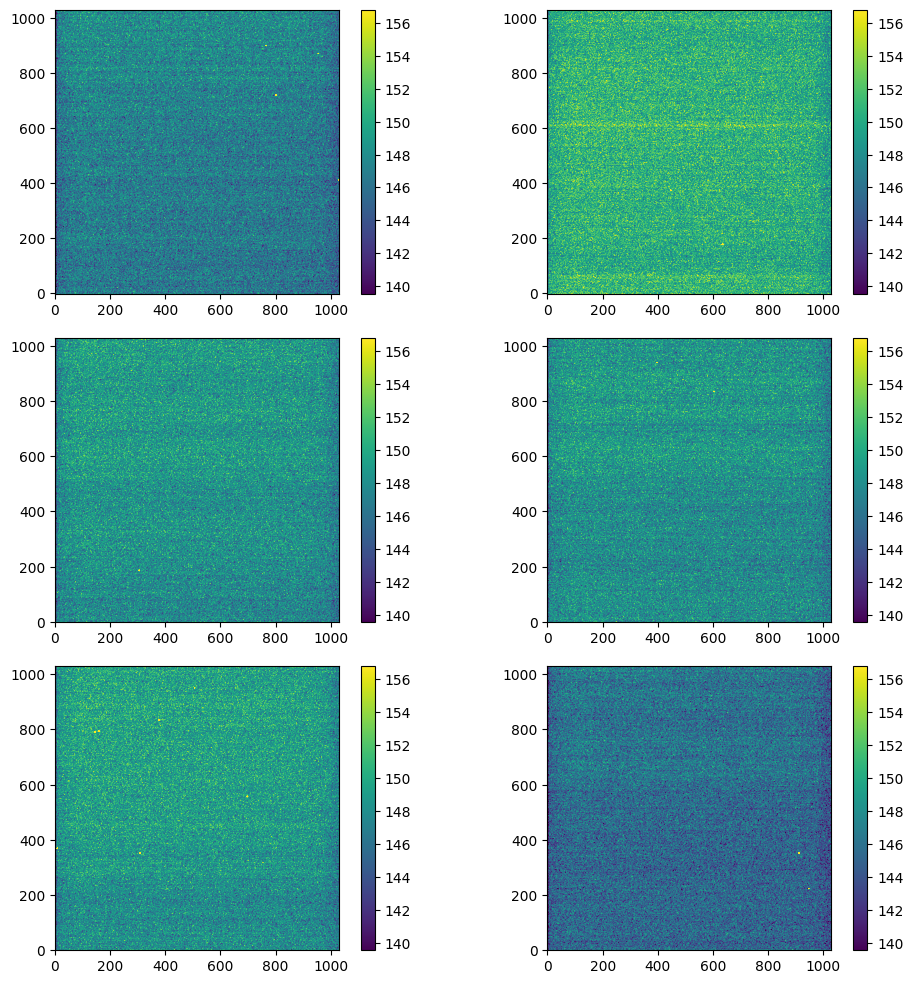

In [32]:
import os
import dfitspy
from astropy.io import fits 
import numpy as np
from matplotlib import pyplot as plt

dirCALIB = 'M67/CALIB/'
dirBIAS = 'M67/BIAS/'
biasFileList = open('bias.list', 'r')
biasData = []
fileNames = biasFileList.read().splitlines()


for fileName in fileNames:
    ##method : getdata
#     biasFits = fits.getdata(dirCALIB + fileName, dtype = 'f')
#     biasData.append(biasFits[0].data)
    ##method : open
    
    biasFits = fits.open(dirCALIB + fileName)
    data = biasFits[0].data.astype(float)
    biasData.append(data)

    '''
    biasFits : a HDU
    biasFits[0] : the primary HDU
    biasFits[0].data : (only) data from the PHDU, it is a 2D data
    '''
biasFileList.close()

# print(biasData[0])
# print(biasData[0][1029])
# plt.imshow(biasData[0])

means = []
stdev = []
max = []
min = []
for data in biasData:
    means.append(np.mean(data))
    stdev.append(np.std(data))
    max.append(np.max(data))
    min.append(np.min(data))
# print(means)
# print(stdev)
# print(max)
# print(min)

print('avrg mean : ',np.mean(means))
print('avrg stdev : ',np.mean(stdev))
print('avrg max : ',np.mean(max))
print('avrg min : ',np.mean(min))

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0)
# plt.subplots_adjust(wspace=0.01,hspace=0.01)
plt.tight_layout()
for i in range(0,3):
    for j in range(0,2):
        im = axs[i][j].imshow(biasData[2*i+j], origin = 'lower', vmin = np.mean(biasData) - np.std(biasData), vmax = np.mean(biasData) + np.std(biasData))
        fig.colorbar(im, ax = axs[i,j])
        # fig.colorbar(im, ax = axs[i,j],fraction=0.046, pad=0.04)
        # axs[i][j].subplots_adjust(wspace=0.01,hspace=0.01)
        

In [1]:
import numpy as np
import os
import shutil
import dfitspy
dirCALIB = 'M67/CALIB/'
dirBIAS = 'M67/BIAS/'

listfile = dfitspy.get_files(['all'], dire = dirCALIB)
biasFileList = np.loadtxt('bias.list', dtype ='str')

for i in range(len(biasFileList)):
    for j in range(len(listfile)):
        if listfile[j] == 'M67/CALIB/' + biasFileList[i]:
            shutil.copy2(listfile[j], 'M67/BIAS/')
print(os.listdir())

['Exercise 2.pdf', '.DS_Store', 'Ex2_Cyan.ipynb', 'Exercise 2 (1).ipynb', 'biasStdev.list', 'Exercise2-1-2.png', 'Exercise 2(2).ipynb', 'ex2-0.py', 'sandbox.py', 'biasDark.list', 'M67', '.ipynb_checkpoints', 'bias.list']


In [6]:
!jt -t monokai -T

In [ ]:
!jt 

In [47]:
import os
import dfitspy
from astropy.io import fits 
import numpy as np

dirCALIB = 'M67/CALIB/'
biasFileList = open('bias.list', 'r')
biasFits = []
for fileName in fileNames:
    biasFitsFile = fits.open(dirCALIB + fileName)
    biasFits.append(biasFitsFile[0].data.astype(float))
    '''
    biasFitsFile : a HDU
    biasFitsFile[0] : the primary HDU
    biasFitsFile[0].data : (only) data from the PHDU, it is a 2D data
    '''
biasFileList.close()

fractions = [1, 0.9, 0.75, 0.66, 0.5]
stdev = []

def stats(f):
    bottom = 500 - round(500*f)
    top = 500 + round(500*f)
    print('-------------------------')
    print('lower limit : ', bottom)
    print('upper limit : ', top)
    region = []
    for data in biasData:
        region.append(data[bottom:top][bottom:top])
        
    means = []
    max = []
    min = []
    for data in region:
        means.append(np.mean(data))
        stdev.append(np.std(data))
        max.append(np.max(data))
        min.append(np.min(data))
    print()
    print('mean : ',np.mean(means))
    print('stdev : ',np.mean(stdev)/np.sqrt(len(biasFits)))
    print('max : ',np.mean(max))
    print('min : ',np.mean(min))

    
for f in fractions:
    stats(f)
    
def saveStdev():
    stdevList = open('biasStdev.list', 'w')
    for std in stdev:
        stdevList.write('%f' % std)
        stdevList.write('\n')
        print(std)
    stdevList.close()
print('stdev')
saveStdev()

-------------------------
lower limit :  0
upper limit :  1000

mean :  148.16445565533982
stdev :  1.3157152868686341
max :  2675.525
min :  113.0
-------------------------
lower limit :  50
upper limit :  950

mean :  148.19159094802973
stdev :  1.3209038987310566
max :  2456.075
min :  113.3
-------------------------
lower limit :  125
upper limit :  875

mean :  148.26017739805826
stdev :  1.3238565895203134
max :  2119.5
min :  113.775
-------------------------
lower limit :  170
upper limit :  830

mean :  148.31394427382605
stdev :  1.3210281737716747
max :  1724.375
min :  114.25
-------------------------
lower limit :  250
upper limit :  750

mean :  148.44108165048544
stdev :  1.3145051211435685
max :  1113.05
min :  115.15
stdev
14.526166711459462
7.765642285842832
7.275819532880713
7.308690979199141
12.640558795370882
7.313830402392631
12.815661012145311
7.598372488478857
13.197030894121518
7.239711590990878
7.36812863751162
7.803965001829181
7.384988111411522
7.81281814553

### Exercise2-4 RON
1.a bias data is acquired by taking 0-second exposure with the shutter closed
 * thus the bias data gives us the mechanical offset of the detector
 * readout noise is one of the values that indicate the mechanical status of the detector  
 
2.header obj for readout noise
> `HIERARCH ESO DET OUT2 RON`    =         0.00 / Readout noise per output (e-)   
> `HIERARCH ESO DET OUT2 GAIN`   =         0.48 / Conversion from electrons to ADU

## Instruction  14 Sep Torsdag
1. structure in the bias frame
    * structure : **Spot**, dot, stripe
    * non-uniformity over the field
    * bias level : more or less the same (148±5?ADU)
1. stack of bias images
    * there are tiny gradients
        (few horizontal rows in the middle)
    * we cannot rely on a single constant
1. master bias frame
    * 148±1.5 ADU
* phtons, electrons : not Poissonian behaviour
* RON 
#### RON formular :  page 73 of Howell's
$RON = gain* \frac{\sigma_{B1-B2}}{ \sqrt(2)} $  
because  

$\sigma^2 = \sigma_{B1}^2 + \sigma_{B2}^2$
* open('filename',uint = False)

* multiplying `1.` : float
diff = data1*1. - data2*1.
bias level = std(data1,dat12)/ sqrt(2) * gain

≈7.1644


In [8]:
import os
from astropy.io import fits
import dfitspy
dirCALIB = 'M67/CALIB/'
biasFileList = open('bias.list', 'r')

listKeys = ['HIERARCH ESO DET OUT2 RON','HIERARCH ESO DET OUT2 GAIN']
    
biasFitsData = []
biasFitsHeader = []
fileNames = biasFileList.read().splitlines()
for fileName in fileNames:
    biasFitsFile = fits.open(dirCALIB + fileName)
    biasFitsData.append(biasFitsFile[0].data.astype(float))
    biasFitsHeader = biasFitsFile[0].header
biasFileList.close()
fitsFile.close()

##---difference of images
print(biasFitsData[0])
print(biasFitsData[1])
print(biasFitsData[0][0])
print(biasFitsData[0][0])

for i in range(len(biasFitsData)):
    for j in range(len(biasFitsData)):
        for k in range(len(biasFitsData)):
            if j > k:
                
ADU = np.mean(biasHeader[listKeys[0]])
GAIN = np.mean(biasHeader[listKeys[1]])

## stdev from 'biasStdev.list'----
stdevList = open('biasStdev.list','r')
stdevs = np.array(stdevList.read().splitlines(), dtype = 'f')
stdevList.close()

#####---------------------------------------------------------
RON = []
diffStdev = []
for i in range(len(stdevs)):
    for j in range(len(stdevs)):
        if j > i:
            diff = stdevs[i] + stdevs[j]
            RON.append(GAIN*diff/np.sqrt(len(stdevs)))

print('adu = ', adu)
print('gain = ', gain)
# print('stdev', stdevs)
# print('RON', RON)
# plt.hist(RON)
# plt.show()

IndentationError: expected an indented block (2454419698.py, line 30)

### make summary table
* use ccdp, and summary fuction

In [12]:
from astropy.nddata import CCDData
from astropy.stats import mad_std

import ccdproc as ccdp
from pathlib import Path
from ccdproc import ImageFileCollection

save_path = Path('Users/Desktop/AstronomicalDataProcessing/Exercise/Ex2')
imcol = ImageFileCollection('M67/BIAS/')
imcol.summary

<Table masked=True length=42>
               file                simple bitpix naxis naxis1 naxis2 origin ...     checksum     combined bunit  wcsaxes latpole mjdref
              str34                 bool  int64  int64 int64  int64   str3  ...      str16        object  object  object  object object
---------------------------------- ------ ------ ----- ------ ------ ------ ... ---------------- -------- ------ ------- ------- ------
EFOSC.2000-12-28T22:09:41.589.fits   True     16     2   1030   1030    ESO ... ZHHCdFE9ZFECbFE9       --     --      --      --     --
EFOSC.2000-12-28T22:10:14.308.fits   True     16     2   1030   1030    ESO ... H448K118H118H118       --     --      --      --     --
EFOSC.2000-12-28T22:10:46.963.fits   True     16     2   1030   1030    ESO ... Ih31Jf00If00If00       --     --      --      --     --
EFOSC.2000-12-28T22:11:19.687.fits   True     16     2   1030   1030    ESO ... PbQhQZPgPaPgPYPg       --     --      --      --     --
EFOSC.2000-12-28T22:11:52.400.fits   True     16     2   1030   1030    ESO ... fcW5hbT2fbT2fbT2       --     --      --      --     --
EFOSC.2000-12-29T04:38:45.156.fits   True     16     2   1030   1030    ESO ... J9IEK8I9J8ICJ8I9       --     --      --      --     --
EFOSC.2000-12-29T04:39:18.017.fits   True     16     2   1030   1030    ESO ... fap5gUm3fam3fUm3       --     --      --      --     --
EFOSC.2000-12-29T04:39:50.783.fits   True     16     2   1030   1030    ESO ... ARSaAPQUAPQZAPQZ       --     --      --      --     --
EFOSC.2000-12-29T04:40:23.593.fits   True     16     2   1030   1030    ESO ... 3RYeAOVZ5OVbAOVZ       --     --      --      --     --
EFOSC.2000-12-29T04:40:56.374.fits   True     16     2   1030   1030    ESO ... ieXFlZX9ibXEiZX9       --     --      --      --     --
EFOSC.2000-12-29T05:25:39.820.fits   True     16     2   1030   1030    ESO ... m34hm12gm12gm12g       --     --      --      --     --
EFOSC.2000-12-29T05:26:12.621.fits   True     16     2   1030   1030    ESO ... 9Ca9EBV89BZ8EBZ8       --     --      --      --     --
EFOSC.2000-12-29T05:26:45.460.fits   True     16     2   1030   1030    ESO ... 2OeE4NcB2NcB2NcB       --     --      --      --     --
EFOSC.2000-12-29T05:27:18.121.fits   True     16     2   1030   1030    ESO ... d346f236d236d236       --     --      --      --     --
EFOSC.2000-12-29T05:27:50.801.fits   True     16     2   1030   1030    ESO ... 3TIIARFG6RFGARFG       --     --      --      --     --
EFOSC.2000-12-29T22:07:32.408.fits   True     16     2   1030   1030    ESO ... dakrdZjodajodWjo       --     --      --      --     --
EFOSC.2000-12-29T22:08:05.339.fits   True     16     2   1030   1030    ESO ... WOURaORQXORQaORQ       --     --      --      --     --
EFOSC.2000-12-29T22:08:38.107.fits   True     16     2   1030   1030    ESO ... S4M5T2J3S2J3S2J3       --     --      --      --     --
                               ...    ...    ...   ...    ...    ...    ... ...              ...      ...    ...     ...     ...    ...
EFOSC.2000-12-30T04:21:01.051.fits   True     16     2   1030   1030    ESO ... 0cRB0bP90bPA0bP7       --     --      --      --     --
EFOSC.2000-12-30T04:21:33.840.fits   True     16     2   1030   1030    ESO ... GY4aGV3aGV3aGV3a       --     --      --      --     --
EFOSC.2000-12-30T05:17:49.057.fits   True     16     2   1030   1030    ESO ... Wij7Zig7Wig7Wig7       --     --      --      --     --
EFOSC.2000-12-30T05:18:21.925.fits   True     16     2   1030   1030    ESO ... ifAnjd6midAmid3m       --     --      --      --     --
EFOSC.2000-12-30T05:18:54.760.fits   True     16     2   1030   1030    ESO ... 9coaFZnY9anaEYnY       --     --      --      --     --
EFOSC.2000-12-30T05:19:27.625.fits   True     16     2   1030   1030    ESO ... 963QD50N950NC50N       --     --      --      --     --
EFOSC.2000-12-30T05:20:00.381.fits   True     16     2   1030   1030    ESO ... 19LA36K616KA16K5       --     --      --      --     --
EFOSC.2000-12-31T00:18:11.

### Exercise2-5
* `CCDproc` : https://www.astropy.org/ccd-reduction-and-photometry-guide/v/dev/notebooks/02-04-Combine-bias-images-to-make-master.html
* bias_images = [datapath + im for im in biasList]

### Exercise2-6 Master Bias with all (40) bias files
* use `os.getcwd()` to check the current working directory
    * it is different from the directory path of the terminal
* the code should run in the directory where the bias files are 

In [13]:
os.getcwd()

'/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2'

In [17]:
from pathlib import Path
import os

from astropy.nddata import CCDData
from astropy.stats import mad_std
from astropy.io import fits

import ccdproc as ccdp
import matplotlib.pyplot as plt
import numpy as np
##-- copy the current directory to identify the location of
print(os.getcwd())
os.chdir('M67/BIAS/')
calibrated_path = Path('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/BIAS/')
reduced_images = ccdp.ImageFileCollection(calibrated_path)

print(os.getcwd())
## the working directory was Ex2 so it needed to be changed to Ex2/M67/BIAS/
# os.chdir('M67/BIAS/')
os.listdir()
bias_images = [im for im in os.listdir() if im.endswith('.fits')]
print(len(bias_images))

combined_bias = ccdp.combine(bias_images,
                             unit ='adu',
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=2, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )

combined_bias.meta['combined'] = True

combined_bias.write(calibrated_path / 'combined_bias.fit', overwrite = True)


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes.


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/BIAS
40
INFO: splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

### Exercise2-6 Master Bias with 3 bias files and 40 bias files
* put the bias files in a separate directory
* combine 3 bias files and 40 bias files respectively to creat master bias images
* crop the edges
* the resulting image shows that the master bias made out of 40 bias files is more uniform and has smaller stdev.

In [18]:
from pathlib import Path
import ccdproc as ccdp

print(os.getcwd())
# bias_images = [im for im in os.listdir() if im.endswith('.fits')]
# print(len(bias_images))

bias_images_3 = []
for i in range(0,3):
    bias_images_3.append(os.listdir()[i])
print(len(bias_images_3))

combined_bias_3 = ccdp.combine(bias_images_3,
                             unit ='adu',
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=2, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func=mad_std,
                             mem_limit=350e6
                            )

combined_bias_3.meta['combined'] = True

combined_bias_3.write(calibrated_path / 'combined_bias_3.fit', overwrite = True)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/BIAS
3


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:using the unit adu passed to the FITS reader instead of the unit adu in the FITS file.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


INFO: using the unit adu passed to the FITS reader instead of the unit adu in the FITS file. [astropy.nddata.ccddata]


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/BIAS
shape :  (800, 800)
mean :  148.81504552012515
stdev :  1.3272978714562036
max :  155.54545454545453
min :  142.64102564102564
--------------------------------------------
shape :  (800, 800)
mean :  149.43215585937497
stdev :  4.926960882246678
max :  177.44444444444446
min :  124.25


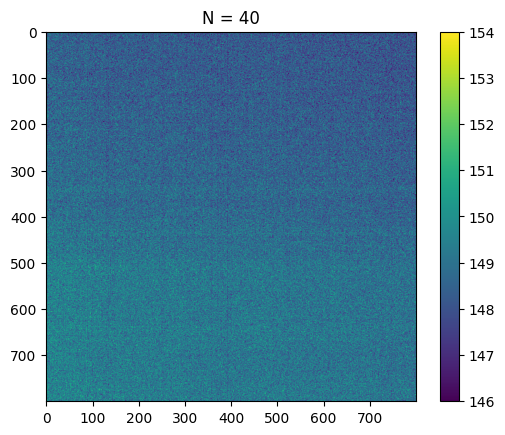

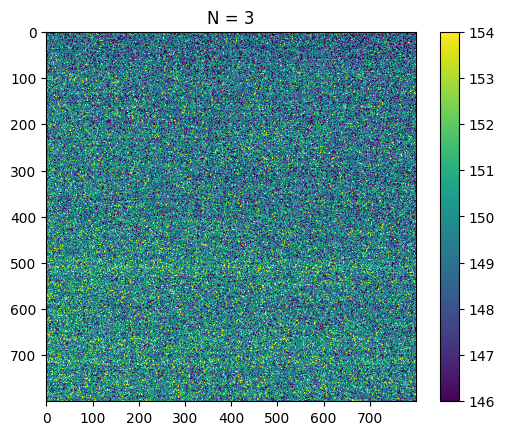

In [41]:
os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/BIAS')
print(os.getcwd())

dataB, header = fits.getdata('combined_bias.fit', header = True)
data = dataB[100:900,100:900]

print('shape : ', data.shape)
print('mean : ', np.mean(data))
print('stdev : ', np.std(data))
print('max : ', np.max(data))
print('min : ', np.min(data))

print('--------------------------------------------')
dataB3, header3 = fits.getdata('combined_bias_3.fit', header = True)
data3 = dataB3[100:900,100:900]

print('shape : ', data3.shape)
print('mean : ', np.mean(data3))
print('stdev : ', np.std(data3))
print('max : ', np.max(data3))
print('min : ', np.min(data3))

# fig, (ax1, ax2) = plt.subplots(1, 2)
im1 = plt.imshow(data, vmin=146, vmax=154)
plt.title('N = 40')
plt.colorbar()
plt.show()
im2 = plt.imshow(data3, vmin=146, vmax=154)
plt.title('N = 3')
plt.colorbar()
plt.show()


(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([140. , 140.3, 140.6, 140.9, 141.2, 141.5, 141.8, 142.1, 142.4,
        142.7, 143. , 143.3, 143.6, 143.9, 144.2, 144.5, 144.8, 145.1,
        145.4, 145.7, 146. , 146.3, 146.6, 146.9, 147.2, 147.5, 147.8,
        148.1, 148.4, 148.7, 149. , 149.3, 149.6, 149.9, 150.2, 150.5,
        150.8, 151.1, 151.4, 151.7, 152. , 152.3, 152.6, 152.9, 153.2,
        153.5, 153.8, 154.1, 154.4, 154.7, 155. ]),
 <a list of 800 Lists of Patches objects>)

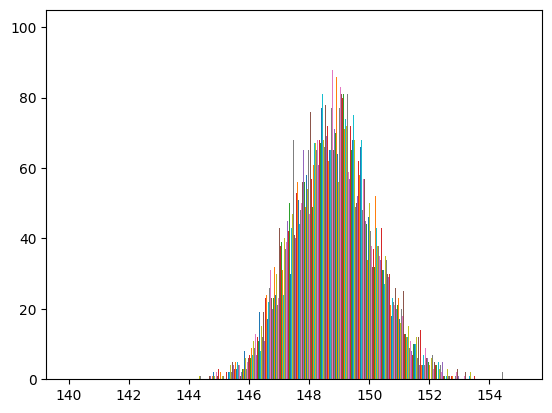

In [35]:
plt.hist(data, bins = 50, range=[140,155], rwidth = 1)

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/BIAS
N=40
shape :  (6, 1030)
mean :  148.65804499216574
stdev :  1.3913708358123507
N=3
shape :  (6, 1030)
mean :  149.10466558791802
stdev :  4.848809874256844
N=40
shape :  (1030, 6)
mean :  145.7610074456066
stdev :  1.252227369420705
N=3
shape :  (1030, 6)
mean :  146.1497303128371
stdev :  4.717851989984548


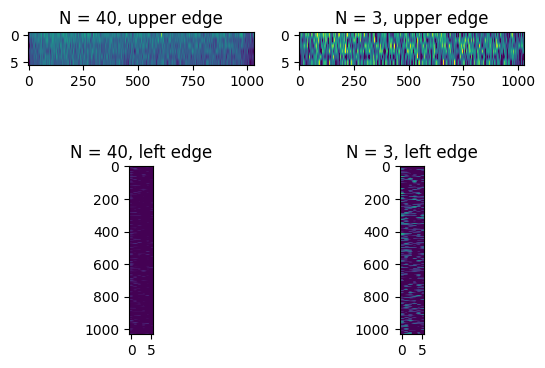

In [36]:
print(os.getcwd())

dataB, header = fits.getdata('combined_bias.fit', header = True)
dataB3, header3 = fits.getdata('combined_bias_3.fit', header = True)

dataUpEdge = dataB[0:6,:]
data3UpEdge = dataB3[0:6,:]
print('N=40')
print('shape : ', dataUpEdge.shape)
print('mean : ', np.mean(dataUpEdge))
print('stdev : ', np.std(dataUpEdge))
print('N=3')
print('shape : ', data3UpEdge.shape)
print('mean : ', np.mean(data3UpEdge))
print('stdev : ', np.std(data3UpEdge))

dataLeftEdge = dataF[:,0:6]
data3LeftEdge = dataF3[:,0:6]
print('N=40')
print('shape : ', dataLeftEdge.shape)
print('mean : ', np.mean(dataLeftEdge))
print('stdev : ', np.std(dataLeftEdge))
print('N=3')
print('shape : ', data3LeftEdge.shape)
print('mean : ', np.mean(data3LeftEdge))
print('stdev : ', np.std(data3LeftEdge))

fig, axs = plt.subplots(2,2)
axs[0][0].set_title('N = 40, upper edge')
axs[0][1].set_title('N = 3, upper edge')
axs[1][0].set_title('N = 40, left edge')
axs[1][1].set_title('N = 3, left edge')

axs[0][0].imshow(dataUpEdge, vmin=146, vmax=154, aspect = 25)
axs[0][1].imshow(data3UpEdge, vmin=146, vmax=154, aspect = 25)
axs[1][0].imshow(dataLeftEdge, vmin=146, vmax=154, aspect = 0.04)
axs[1][1].imshow(data3LeftEdge, vmin=146, vmax=154, aspect = 0.04)


### Dark
* bias : zero-second exposure
    * used to calibrate the read-out noise
    * temperature, gain, offset, exposure time
* dark
    * longer exposure than bias
    * used to calibrate heat noise(temperature sensitivity)

#### copy the dark files to DARK directory

In [4]:
import numpy as np
import os
import shutil
import dfitspy

print(os.getcwd())
os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2')
dirCALIB = 'M67/CALIB/'
dirBIAS = 'M67/BIAS/'
dirDark = 'M67/DARK/'

listfile = dfitspy.get_files(['all'], dire = dirCALIB)
darkFileList = np.loadtxt('biasDark.list', dtype ='str')

for i in range(len(darkFileList)):
    for j in range(len(listfile)):
        if listfile[j] == 'M67/CALIB/' + darkFileList[i]:
            shutil.copy2(listfile[j], 'M67/DARK/')


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2


['EFOSC.2000-10-27T10:02:55.312.fits', 'EFOSC.2000-10-28T09:37:30.239.fits', 'EFOSC.2000-10-27T20:10:52.021.fits', 'EFOSC.2000-10-27T20:41:24.411.fits', 'EFOSC.2000-10-27T09:32:22.516.fits', 'EFOSC.2000-10-28T10:08:03.127.fits']
avrg mean :  153.85997360731452
avrg stdev :  50.122471915684535
avrg max :  17378.666666666668
avrg min :  116.33333333333333


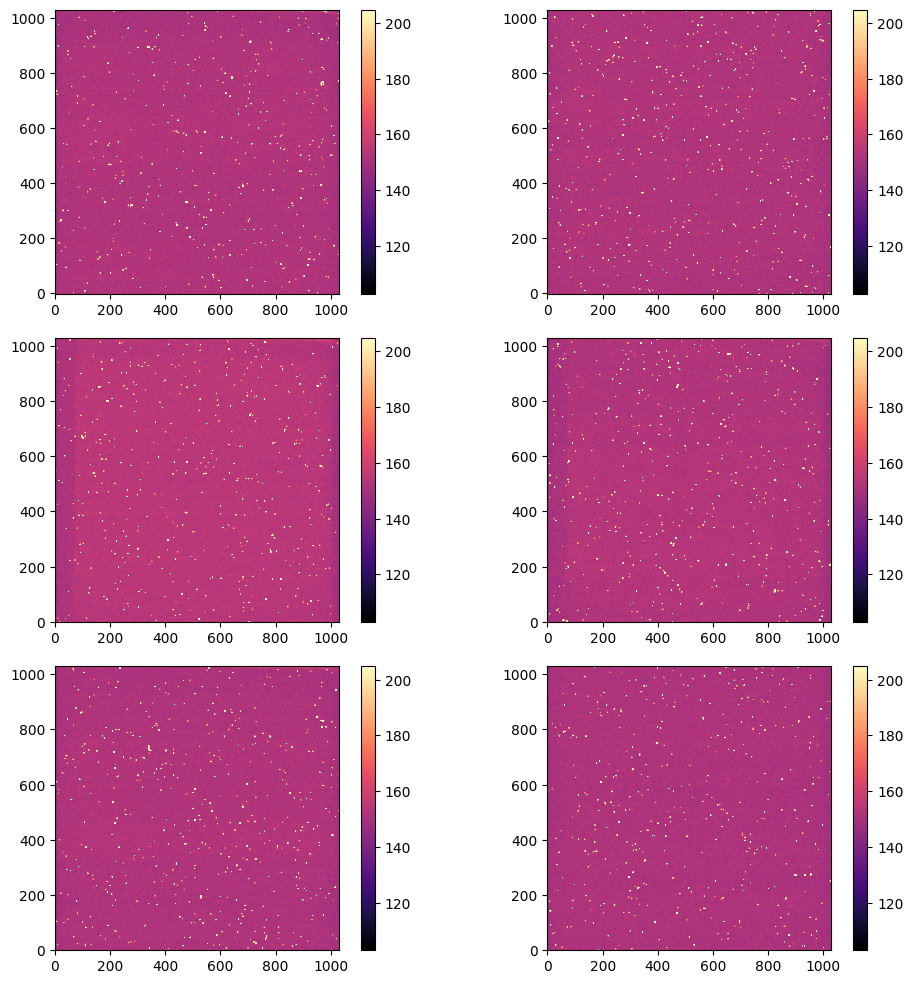

In [8]:
import matplotlib.pyplot as plt
darkFileList = open('biasDark.list', 'r')
darkData = []
fileNames = darkFileList.read().splitlines()
print(fileNames)

for fileName in fileNames:
    ##method : getdata
#     biasFits = fits.getdata(dirCALIB + fileName, dtype = 'f')
#     biasData.append(biasFits[0].data)
    ##method : open
    
    darkFits = fits.open(dirCALIB + fileName)
    data = darkFits[0].data.astype(float)
    darkData.append(data)

    '''
    biasFits : a HDU
    biasFits[0] : the primary HDU
    biasFits[0].data : (only) data from the PHDU, it is a 2D data
    '''
darkFileList.close()
means = []
stdev = []
max = []
min = []
for data in darkData:
    means.append(np.mean(data))
    stdev.append(np.std(data))
    max.append(np.max(data))
    min.append(np.min(data))

dark_images = [im for im in os.listdir() if im.endswith('.fits')]
print('avrg mean : ',np.mean(means))
print('avrg stdev : ',np.mean(stdev))
print('avrg max : ',np.mean(max))
print('avrg min : ',np.mean(min))

fig, axs = plt.subplots(3, 2, figsize=(10, 10))
plt.subplots_adjust(wspace=0)
# plt.subplots_adjust(wspace=0.01,hspace=0.01)
plt.tight_layout()
for i in range(0,3):
    for j in range(0,2):
        im = axs[i][j].imshow(darkData[2*i+j], origin = 'lower', vmin = np.mean(darkData) - np.std(darkData), vmax = np.mean(darkData) + np.std(darkData), cmap = 'magma')
        fig.colorbar(im, ax = axs[i,j])

#### combine dark files to one

In [60]:
from pathlib import Path
import ccdproc as ccdp
from astropy.nddata import CCDData
from astropy.stats import mad_std
from astropy.io import fits

##-- copy the current directory to identify the location of
calibrated_path = Path('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/DARK/')
reduced_images = ccdp.ImageFileCollection(calibrated_path)

print(os.getcwd())
## the working directory was Ex2 so it needed to be changed to Ex2/M67/BIAS/
# os.chdir('M67/DARK/')
os.listdir()

dark_images = [im for im in os.listdir() if im.endswith('.fits')]
print(len(dark_images))

combined_dark = ccdp.combine(dark_images,
                             unit ='adu',
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=2, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func = mad_std,
                             mem_limit=350e6
                            )

combined_dark.meta['combined'] = True

combined_dark.write(calibrated_path / 'combined_dark.fit', overwrite = True)


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/DARK
6


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


### Master Dark
* 475 ADU
    * 1800 sec exposure
    * gain = 2.1
    * epadu(electrons per ADU) = 0.48
* Dark current : in ADU/pixel/sec or in e-/pixel/sec
* hot pixel : cosmic ray
    * reduce points with huge stdev
* dak current in sciene images : 5 sec exposure

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/DARK
shape :  (800, 800)
mean :  153.74958835937505
stdev :  3.3276900696894285
max :  178.0
min :  137.5


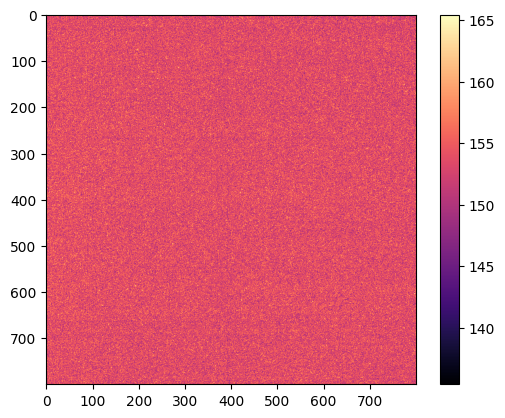

In [36]:
os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/DARK')
print(os.getcwd())
dataD, header = fits.getdata('combined_dark.fit', header = True)
data = dataD[100:900,100:900]

print('shape : ', data.shape)
print('mean : ', np.mean(data))
print('stdev : ', np.std(data))
print('max : ', np.max(data))
print('min : ', np.min(data))

plt.imshow(data, vmin=np.mean(data)-np.std(data), vmax=np.mean(data)-np.std(data), cmap = 'magma')
plt.colorbar()
plt.show()


## combining Master Bias and Master Dark

shape :  (800, 800)
mean :  302.56463387950026
stdev :  3.5961122201111477


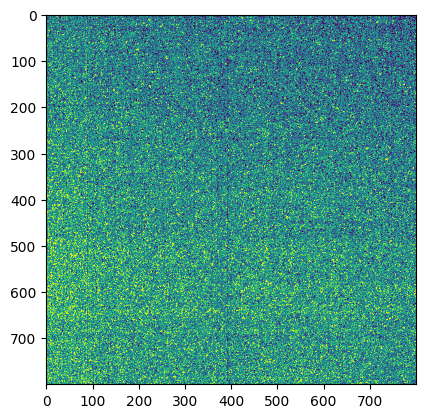

In [13]:
os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2')
dirCALIB = 'M67/CALIB/'
dirBIAS = 'M67/BIAS/'
dirDark = 'M67/DARK/'

os.chdir('M67/BIAS/')
dataB, headerB = fits.getdata('combined_bias.fit', header = True)

os.chdir('../DARK/')
dataD, headerD = fits.getdata('combined_dark.fit', header = True)

cropDataB = dataB[100:900,100:900]
cropDataD = dataD[100:900,100:900]

data = cropDataB + cropDataD

print('shape : ', data.shape)
print('mean : ', np.mean(data))
print('stdev : ', np.std(data))

plt.imshow(data, vmin = np.mean(data) - np.std(data), vmax = np.mean(data) + np.std(data))

### Flat
* flat fields : 
    * sky flat: twilight(short)
    * dome flat: small telescope
    blank white, uniform brightness for the blank screen
    * lamp flat
* high intensity required to reduce the error propagated
* sky flat
    * avoid stars
* flat
    * flat field exposures has : ?,?, read noise
    * combining flat field : different intensity level
    * CCD linearity : below saturation level(65,536 for 16bit detector)
        * need to exclude saturated pixels
    * select the right filter : different flats for different filters
    * P-flat :  pixel-to-pixel sensitivity variation
    * L-flat : large scale spatial scale variation
* cosmic ray removing procedure
* `HIERARCH ESO INS FILT1 NAME` : B#639, U#640, V#641, R#642, Free
    * flat : Skyflat, Lampflat in B, V, R
    * skyflat :  twilight
    * lampflat : internal calibration of the instrument
    * illumination could be different : separate two flats
        * B filter does not have lampflat in this example
    * mean value : 39,000 in ADU - statistical
* trail of a star : imshow may not correct
* remove stars : remove outliers (sigma clipping)
* how much  the flat filed is useful? take a single flat and divide by the normalised one : the result will be completely uniform
* SCIENCE image has stars. it must be excluded when we calculate the backgoround

* `combine(,,, sigma_clip = True,)`
* `ccd_process(,,,gain-corrected = False,)`


In [12]:
from pathlib import Path
import os
from astropy.io import fits
import dfitspy
import numpy as np
import shutil
import ccdproc as ccdp
from astropy.nddata import CCDData
from astropy.stats import mad_std

os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2')
dirCALIB = 'M67/CALIB/'

listFiles = dfitspy.get_files(['all'], dire = dirCALIB)
listKeys = ['HIERARCH ESO INS FILT1 NAME', 'OBJECT', 'NAXIS1', 'NAXIS2', 'CDELT1', 'CDELT2','EXPTIME']

##dictionary for filter fits
##filters: Keys
filters = ['B#639', 'U#640', 'V#641', 'R#642']
filterFits = {}
for filter in filters:
    filterFits[filter] = dfitspy.dfitsort(listFiles, listKeys, grepping = [filter, '1030','1030','2', '2'])

##check the fits files
for filter in filters:
    dfitspy.dfitsort_view(filterFits[filter])

## make the list file of each filter
def makeList(listName, fits):
    listFile = open(listName,'w')
    for fileName, value in fits.items():
        listFile.write('%s' % fileName)
        listFile.write('\n')
    listFile.close()

for filter in filters:
    makeList(filter + '.list',filterFits[filter])

## copy filter fits files to the corresponding directory
allFitsFiles = dfitspy.get_files(['all'], dire = dirCALIB)
for filter in filters:
    filterFileList = np.loadtxt(filter + '.list', dtype ='str')
    for i in range(len(filterFileList)):
        for j in range(len(allFitsFiles)):
            if allFitsFiles[j] == 'M67/CALIB/' + filterFileList[i]:
                shutil.copy2(allFitsFiles[j], 'M67/Filter/'+filter+'/')

os.chdir('M67/Filter/')
calibrated_path = []
reduced_images = []
for filter in filters:
    calibrated_path = Path('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/'+filter+'/')
    reduced_images = ccdp.ImageFileCollection(calibrated_path)
    
    os.chdir(filter+'/')
    filter_images = [im for im in os.listdir() if im.endswith('.fits')]
    combined_file = ccdp.combine(filter_images,
                             unit ='adu',
                             method='average',
                             sigma_clip=True, sigma_clip_low_thresh=2, sigma_clip_high_thresh=5,
                             sigma_clip_func=np.ma.median, sigma_clip_dev_func = mad_std,
                             mem_limit=350e6
                            )
    combined_file.meta['combined'] = True
    combinedName = 'combined_'+filter+'.fit'
    combined_file.write(calibrated_path / combinedName , overwrite = True)
    os.chdir('../')
    os.listdir()
    
# print(os.getcwd())
# os.listdir()

             filename             	CDELT1	CDELT2	EXPTIME	HIERARCH ESO INS FILT1 NAME	NAXIS1	NAXIS2	       OBJECT       
----------------------------------	------	------	-------	---------------------------	------	------	--------------------
EFOSC.2000-12-28T22:09:41.589.fits	 2.0  	 2.0  	0.0212 	           B#639           	 1030 	 1030 	        BIAS        
EFOSC.2001-01-04T00:16:13.424.fits	 2.0  	 2.0  	2.6957 	           B#639           	 1030 	 1030 	      SKYFLAT       
EFOSC.2001-01-04T00:14:59.956.fits	 2.0  	 2.0  	2.0955 	           B#639           	 1030 	 1030 	      SKYFLAT       
EFOSC.2001-01-04T00:22:25.677.fits	 2.0  	 2.0  	11.3955	           B#639           	 1030 	 1030 	      SKYFLAT       
EFOSC.2001-01-04T00:15:36.618.fits	 2.0  	 2.0  	 2.396 	           B#639           	 1030 	 1030 	      SKYFLAT       
EFOSC.2001-01-03T08:48:04.849.fits	 2.0  	 2.0  	9.9968 	           B#639           	 1030 	 1030 	PG-1323-086-phot-std
EFOSC.2001-01-04T00:14:23.696.fits	 2.0 

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:splitting each image into 3 chunks to limit memory usage to 350000000.0 bytes.


INFO: splitting each image into 3 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

INFO: splitting each image into 5 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

INFO: splitting each image into 6 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

#### Flat for each filter

In [89]:
import os
from astropy.io import fits
import dfitspy
import numpy as np
import shutil
import ccdproc as ccdp
from astropy.nddata import CCDData
from astropy.stats import mad_std

dirCALIB = 'M67/CALIB/'
dirB = 'M67/Filter/#639/'
dirU = 'M67/Filter/U#640/'
dirV = 'M67/Filter/V#641/'
dirR = 'M67/Filter/R#642/'
dir = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/'
# os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/'+dirR)
print(os.getcwd())

listFiles = dfitspy.get_files(['all'], dire = 'M67/CALIB/')
listKeys = ['HIERARCH ESO INS FILT1 NAME', 'OBJECT', 'NAXIS1', 'NAXIS2', 'CDELT1', 'CDELT2','EXPTIME']

skyFlatFits = {}
lampFlatFits = {}
filters = ['B#639', 'U#640', 'V#641', 'R#642']
flatType = ['SkyFlat', 'LampFlat']
for filter in filters:
    skyFlatFits[filter] = dfitspy.dfitsort(listFiles, listKeys, grepping = [filter,'SKYFLAT','1030','1030','2', '2'])
    lampFlatFits[filter] = dfitspy.dfitsort(listFiles, listKeys, grepping = [filter,'LAMPFLAT','1030','1030','2', '2'])

### make a list of the fits files
### and 
### copy the fits files to the designated directory
def makeListAndCopyTo(listName, fitses, targetDir):
    listFile = open(listName,'w')
    for fileName, value in fitses.items():
        listFile.write('%s' % fileName)
        listFile.write('\n')
    listFile.close()
    copyFitsToDir(listName, targetDir)

def copyFitsToDir(listName, targetDir):
    allFitsFiles = dfitspy.get_files(['all'], dire = dirCALIB)
    listNames = open(listName, 'r')
    fileNames = listNames.read().splitlines()
    # print(len(fileNames))
    for i in range(len(fileNames)):
        for j in range(len(allFitsFiles)):
            if allFitsFiles[j] == 'M67/CALIB/'+fileNames[i]:
                shutil.copy2(allFitsFiles[j], targetDir)
    listNames.close()

for filter in filters:
    makeListAndCopyTo(filter+'SkyFlat.list', skyFlatFits[filter], 'M67/Filter/'+filter+'/SkyFlat/')
    makeListAndCopyTo(filter+'LampFlat.list', lampFlatFits[filter], 'M67/Filter/'+filter+'/LampFlat/')

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2


### Combine the filter flats

In [38]:
from pathlib import Path
import os
import ccdproc as ccdp
import numpy as np
from astropy.nddata import CCDData
from astropy.stats import mad_std

filters = ['B#639', 'U#640', 'V#641', 'R#642']
flatType = ['SkyFlat', 'LampFlat']
# os.chdir('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter')
# os.chdir('Exercise/Ex2/M67/Filter/')
# os.chdir('../../')
for filter in filters:
    for type in flatType:
        calibrated_path = Path('/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/'+filter+'/'+type+'/')
        reduced_flat = ccdp.ImageFileCollection(calibrated_path)
        print(os.getcwd())
        os.chdir(filter+'/'+type+'/')
        print(os.getcwd())
        flats_files = [im for im in os.listdir() if im.endswith('.fits')]
        if flats_files:
            combined_flat = ccdp.combine(flats_files,
                                     unit ='adu',
                                     method='average',
                                     sigma_clip=True, sigma_clip_low_thresh=2, sigma_clip_high_thresh=5,
                                     sigma_clip_func=np.ma.median, sigma_clip_dev_func = mad_std,
                                     mem_limit=350e6
                                    )
            combined_flat.meta['combined'] = True
            combinedName = 'combined_'+filter+type+'.fit'
            combined_flat.write(calibrated_path / combinedName , overwrite = True)
        os.chdir('../../')
        print(os.getcwd())

the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:splitting each image into 2 chunks to limit memory usage to 350000000.0 bytes.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/B#639/SkyFlat
INFO: splitting each image into 2 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/B#639/LampFlat
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/U#640/SkyFlat
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/U#640/LampFlat
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:splitting each image into 2 chunks to limit memory usage to 350000000.0 bytes.


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/V#641/SkyFlat
INFO: splitting each image into 2 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:splitting each image into 3 chunks to limit memory usage to 350000000.0 bytes.


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/V#641/LampFlat
INFO: splitting each image into 3 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:splitting each image into 2 chunks to limit memory usage to 350000000.0 bytes.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/R#642/SkyFlat
INFO: splitting each image into 2 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
INFO:astropy:splitting each image into 3 chunks to limit memory usage to 350000000.0 bytes.


/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/R#642/LampFlat
INFO: splitting each image into 3 chunks to limit memory usage to 350000000.0 bytes. [ccdproc.combiner]


the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astropy.wcs.wcs]
the RADECSYS keyword is deprecated, use RADESYSa.
the RADECSYS keyword is deprecated, use RADESYSa. [astro

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter


#### Flat images
* Bias + Dark  
mean :  302.56463387950026  
stdev :  3.5961122201111477

/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter
B#639, SkyFlat
shape :  (800, 800)
mean :  0.9904299013662441
stdev :  0.028325106591563134

V#641, SkyFlat
shape :  (800, 800)
mean :  1.0785422346434639
stdev :  0.0325591385596299

V#641, LampFlat
shape :  (800, 800)
mean :  1.0145923974476787
stdev :  0.028786720248192843

R#642, SkyFlat
shape :  (800, 800)
mean :  1.0288232770228036
stdev :  0.02902799131058705

R#642, LampFlat
shape :  (800, 800)
mean :  1.0116499829563592
stdev :  0.029869613693937834



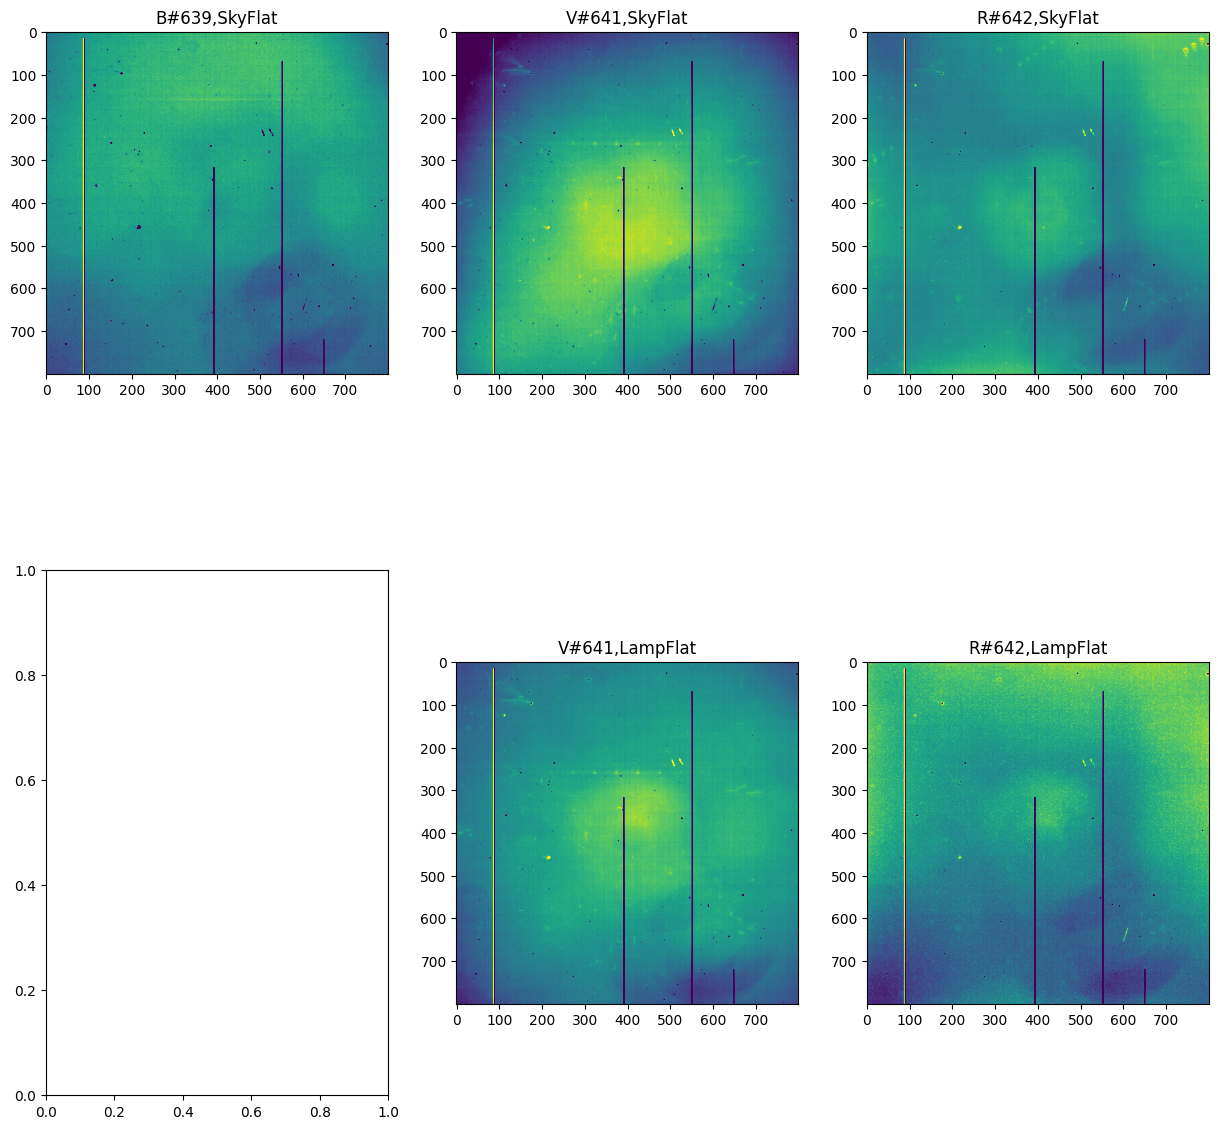

In [1]:
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

dirFilter = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/' 
os.chdir(dirFilter)
print(os.getcwd())
# dirFilter = 'M67/Filter/'

### for Master bias and Master dark
os.chdir('../BIAS/')
dataB, headerB = fits.getdata('combined_bias.fit', header = True)

os.chdir('../DARK/')
dataD, headerD = fits.getdata('combined_dark.fit', header = True)

cropDataB = dataB[100:900,100:900]
cropDataD = dataD[100:900,100:900]

master = cropDataB + cropDataD

os.chdir('../Filter/')
# filters = ['B#639', 'U#640', 'V#641', 'R#642']
filters = ['B#639', 'V#641', 'R#642']
flatType = ['SkyFlat', 'LampFlat']

flatData = {}
flatHeader = {}

fig, axs = plt.subplots(2, 3, figsize=(15, 15))

for i in range(len(filters)):
    filter = filters[i]
    for j in range(len(flatType)):
        type = flatType[j]
        os.chdir(filter+'/'+type+'/')
        path = dirFilter+filter+'/'+type+'/'
        fitsName = 'combined_'+filter+type+'.fit'
        if os.path.exists(fitsName):
            flatData[(filter,type)], flatHeader[(filter,type)]= fits.getdata(fitsName, header = True)
            rawData = flatData[(filter,type)][100:900,100:900]
            data = (rawData - master)/40000
            print(filter+', '+type)
            print('shape : ', data.shape)
            print('mean : ', np.mean(data))
            print('stdev : ', np.std(data))
            print()
            axs[j, i].set_title(filter+','+type)
            axs[j, i].imshow(data, vmin = np.mean(data) - np.std(data), vmax = np.mean(data) + np.std(data))
            # axs[j, i].imshow(normalised, vmin = np.mean(data) - np.std(data), vmax = np.mean(data) + np.std(data))
        os.chdir('../../')

### flatten a flat

In [ ]:
dirFilter = '/Users/yhjo/Desktop/AstronomicalDataProcessing/Exercise/Ex2/M67/Filter/' 
import os
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt

fig, axs = plt.subplots(1, 2, figsize = (15, 15))
filters = ['B#639', 'V#641', 'R#642']
flatType = ['SkyFlat', 'LampFlat']

for i in range(len(filters)):
    os.chdir(filter+'/'+SkyFlat+'/')
        


for i in range(len(filters)):
    filter = filters[i]
    for j in range(len(flatType)):
        type = flatType[j]
        os.chdir(filter+'/'+type+'/')
        path = dirFilter+filter+'/'+type+'/'
        fitsName = 'combined_'+filter+type+'.fit'
        if os.path.exists(fitsName):
            flatData[(filter,type)], flatHeader[(filter,type)]= fits.getdata(fitsName, header = True)
            rawData = flatData[(filter,type)][100:900,100:900]
            data = (rawData - master)/40000
            print(filter+', '+type)
            print('shape : ', data.shape)
            print('mean : ', np.mean(data))
            print('stdev : ', np.std(data))
            print()
            axs[j, i].set_title(filter+','+type)
            axs[j, i].imshow(data, vmin = np.mean(data) - np.std(data), vmax = np.mean(data) + np.std(data))
            # axs[j, i].imshow(normalised, vmin = np.mean(data) - np.std(data), vmax = np.mean(data) + np.std(data))
        os.chdir('../../')

## 2-3 Processing SCIENCE images

### Image Defects
* dark trap, bright trap, dust(remove by processing flat field), fringing, cosmic ray, geometric distortion, influence of the shutter(for short exp time)
    * remove by processing flat field